In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/LDS6_K272_ONLINE_TranBaoGiang/Predicting Customer Spend/retail_transactions.csv')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  int64  
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.3+ MB


In [6]:
#Chuyển dữ liệu cột 'InvoiceDate' thành định dạng datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
#Tạo cột sales
df['Sales'] = df['UnitPrice'] * df['Quantity']

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom,11.8
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom,16.5


In [ ]:
df.groupby(by = ['CustomerID','InvoiceNo','StockCode'])['Sales'].sum()

CustomerID  InvoiceNo  StockCode
12346.0     541431     23166        77183.60
12347.0     537626     20780           55.80
                       20782           32.94
                       21064           35.70
                       21171           17.40
                                      ...   
18287.0     570715     85039B          69.60
                       85173           81.12
            573167     21014            6.96
                       21824           18.72
                       23264           45.00
Name: Sales, Length: 387841, dtype: float64

Từ dữ liệu ban đầu cho thấy, một khách hàng thực hiện mua hàng nhiều lần, một hóa đơn gồm nhiều sản phẩm được mua.

In [ ]:
#Nhóm dữ liệu sao cho dữ liệu của mỗi giao dịch nằm trên 1 hàng
df = df.groupby(by =['InvoiceNo']).agg({
    'Sales':sum,
    'InvoiceDate':'first',
    'CustomerID':'first'
})

In [ ]:
#Vì so sánh dữ liệu năm 2010 với chỉ tiêu năm 2011.
#Vì vậy cần tạo cột năm để xác định feature theo năm.
df['year'] = df['InvoiceDate'].apply(lambda x:x.year)
df.head()

,Sales,InvoiceDate,CustomerID,year
InvoiceNo,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,2010
536366,22.20,2010-12-01 08:28:00,17850.0,2010
536367,278.73,2010-12-01 08:34:00,13047.0,2010
536368,70.05,2010-12-01 08:34:00,13047.0,2010
536369,17.85,2010-12-01 08:35:00,13047.0,2010


In [ ]:
#Ngày thực hiện giao dịch cũng là feature quan trọng.
#Những ngày kể từ khi giao dịch của khách hàng vào cuối năm, đầu nằm --> cho biết 1 phần lịch
#sử mua hàng của khách hàng.
#Đối với mỗi giao dịch --> tính toán có bao nhiêu ngày chênh lệch giữa ngày cuối cùng của 2010
#và InvoiceDate.

In [ ]:
df['days_since'] = (pd.datetime(year = 2010, month = 12, day = 31) -
 df['InvoiceDate']).apply(lambda x: x.days)

In [ ]:
df.head()

,Sales,InvoiceDate,CustomerID,year,days_since
InvoiceNo,,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,2010,29
536366,22.20,2010-12-01 08:28:00,17850.0,2010,29
536367,278.73,2010-12-01 08:34:00,13047.0,2010,29
536368,70.05,2010-12-01 08:34:00,13047.0,2010,29
536369,17.85,2010-12-01 08:35:00,13047.0,2010,29


In [ ]:
#Xác định số ngày hoạt động của khách hàng: max, min
#Xác định số ngày duy nhất khách hàng đã mua hàng

In [ ]:
X = df[df['year']==2010].groupby(by = 'CustomerID').agg({
    'Sales':sum,
    'days_since':['max','min','nunique']
})
X.head()

Sales days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

In [ ]:
X.columns = ['_'.join(col).lower() for col in X.columns.values]
X.head()

,sales_sum,days_since_max,days_since_min,days_since_nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


In [ ]:
#Chi tiêu trung bình của mỗi đơn hàng (avg_order_cost)
X['avg_order_cost'] = X['sales_sum']/X['days_since_nunique']
X.head()

,sales_sum,days_since_max,days_since_min,days_since_nunique,avg_order_cost
CustomerID,,,,,
12347.0,711.79,23,23,1,711.79
12348.0,892.80,14,14,1,892.80
12370.0,1868.02,16,13,2,934.01
12377.0,1001.52,10,10,1,1001.52
12383.0,600.72,8,8,1,600.72


Feature input:
- Doanh thu trên từng khách hàng: sales_sum
- Số ngày hoạt động lấu nhất của từng khách hàng: days_since_max
- Số ngày hoạt động ngắn nhất của từng khách hàng: days_since_min
-Ngày duy nhất khách hàng đã mua: days_since_unique
- Chi tiêu trung bình trên từng đơn hàng của khách hàng: avg_order_cost

In [ ]:
#Tổng doanh thu 2011 (sales_2011)
y = df[df['year']==2011].groupby(by = 'CustomerID')['Sales'].sum()
y.head()

CustomerID
12346.0    77183.60
12347.0     3598.21
12348.0      904.44
12349.0     1757.55
12350.0      334.40
Name: Sales, dtype: float64

In [ ]:
data = pd.concat([X,y],axis=1)
data.head()

,sales_sum,days_since_max,days_since_min,days_since_nunique,avg_order_cost,Sales
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [ ]:
data.columns = ['2010_sales',
                'days_since_first_purchase',
                'days_since_last_purchase',
                'number_of_purchase',
                'avg_order_cost',
                '2011_sales']

data.head()

,2010_sales,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011_sales
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [ ]:
#Một số khách hàng chỉ hoạt động trong năm 2010 hoặc 2011 --> tập dữ liệu data có giá trị Null.
#Để xác định mục tiêu cho năm 2011, cần xóa dữ liệu khách hàng có giá trị null.
#Model dự đoán chỉ tiêu khách hàng trong năm 2011 với giả định khách hàng vẫn còn hoạt động. 

In [ ]:
data = data[~data['2010_sales'].isnull()]
data = data[~data['2011_sales'].isnull()]

In [ ]:
data.head()

,2010_sales,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011_sales
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


In [ ]:
data.shape

(766, 6)

In [ ]:
data.describe()

,2010_sales,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011_sales
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,696.132402,21.528721,18.830287,1.411227,447.381247,5142.864661
std,1563.130138,5.575491,5.891163,0.964374,682.930729,17637.619530
min,12.450000,7.000000,7.000000,1.000000,12.450000,10.000000
25%,214.830000,17.000000,14.000000,1.000000,190.425000,585.452500
50%,348.080000,22.000000,18.000000,1.000000,304.227500,1664.980000
75%,656.230000,26.500000,23.000000,2.000000,433.981250,3801.075000
max,27834.610000,29.000000,29.000000,14.000000,13917.305000,271614.140000


In [ ]:
#Áp dụng định IQR để loại bỏ outlier (outlier > 3Sigma). Trong trường trường này, outlier
#được xem là nhóm khách hàng vượt trội về doanh thu 2010 và 2011

In [ ]:
data = data[data['2010_sales']<((data['2010_sales'].median()) + data['2010_sales'].std())]

In [ ]:
data = data[data['2011_sales']<((data['2011_sales'].median()) + data['2011_sales'].std())]

In [ ]:
data.describe()

,2010_sales,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011_sales
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,411.026066,21.327869,19.241431,1.269747,336.764793,1942.570924
std,316.888702,5.607281,5.799239,0.573254,259.482522,1803.228001
min,12.450000,7.000000,7.000000,1.000000,12.450000,10.000000
25%,197.940000,17.000000,15.000000,1.000000,179.987500,511.665000
50%,317.500000,22.000000,20.000000,1.000000,288.500000,1362.910000
75%,502.170000,25.000000,24.000000,1.000000,383.295000,2875.830000
max,1884.710000,29.000000,29.000000,4.000000,1835.010000,7821.800000


Lưu tập dữ liệu mới

In [ ]:
data.to_csv('data_transactions.csv')

#Data Analysis

In [ ]:
data.corr()

,2010_sales,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011_sales
2010_sales,1.000000,0.062836,-0.210449,0.387394,0.833675,0.437671
days_since_first_purchase,0.062836,1.000000,0.686504,0.316048,-0.112101,0.004188
days_since_last_purchase,-0.210449,0.686504,1.000000,-0.377439,-0.027828,-0.160194
number_of_purchase,0.387394,0.316048,-0.377439,1.000000,-0.111628,0.256550
avg_order_cost,0.833675,-0.112101,-0.027828,-0.111628,1.000000,0.328105
2011_sales,0.437671,0.004188,-0.160194,0.256550,0.328105,1.000000


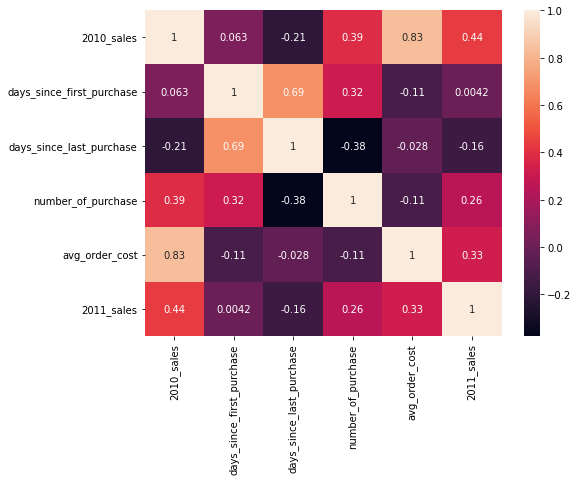

In [ ]:
plt.figure(figsize = (8,6))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Từ kết quả ma trận correlation cho thấy:
- 2010_sales có mối tương quan thuận, mạnh với các biến days_since_frist_purchase, avg_order_cost.
- days_since_first_purchase có mối tương quan thuận, mạnh với biến days_since_last_purchase.

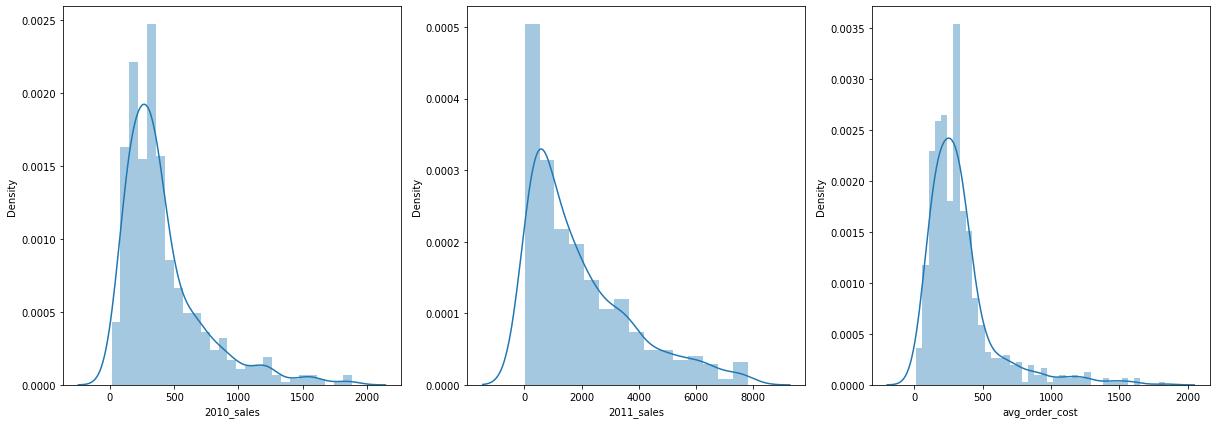

In [ ]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (17,6))
sns.distplot(data['2010_sales'], ax=ax1)
sns.distplot(data['2011_sales'], ax=ax2)
sns.distplot(data['avg_order_cost'], ax=ax3)
f.tight_layout()
plt.show()

Dữ liệu các biến 2010_sales, 2011_sales, avg_order_cost có xu hướng lệch phải.
Vì vậy, có thễ sử dụng kỹ thuật log để scale dự liệu.

In [ ]:
data['2010_sales_log'] = np.log(data['2010_sales'])
data['avg_order_log'] = np.log(data['avg_order_cost'])
data.head()

,2010_sales,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011_sales,2010_sales_log,avg_order_log
CustomerID,,,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21,6.567783,6.567783
12348.0,892.80,14.0,14.0,1.0,892.80,904.44,6.794363,6.794363
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67,7.532634,6.839487
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60,6.909274,6.909274
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84,6.398129,6.398129


In [ ]:
data['2011_sales_log'] = np.log(data['2011_sales'])

In [ ]:
#Create X, y
X = data[['2010_sales_log',
          'days_since_last_purchase',
          'number_of_purchase',
          'avg_order_log'
]]
y = data['2011_sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 12)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error

In [ ]:
models = [
          LinearRegression(),
          SVR(),
          RandomForestRegressor()
]

In [ ]:
for model in models:
  model.fit(X_train,y_train)
  model_name = model.__class__.__name__
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  R_square_train = r2_score(y_true = y_train, y_pred=train_preds)
  MSE = median_absolute_error(y_true = y_train,y_pred=train_preds)
  print(model_name,':\n','R^2:%0.2f'%(R_square_train),'\n','MSE:%0.2f'%(MSE))

LinearRegression :
 R^2:0.23 
 MSE:1052.99
SVR :
 R^2:-0.11 
 MSE:1000.53
RandomForestRegressor :
 R^2:0.87 
 MSE:345.93


In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
print('Score of mode:',model.score(X_test,y_test))

Score of mode: -0.08974373956588177


In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
print('R-square of train:', r2_score(y_true=y_train,y_pred = train_pred))
print('R-square of test:', r2_score(y_true=y_test,y_pred=test_pred))

R-square of train: 0.8727012694252789
R-square of test: -0.08974373956588177


In [ ]:
print('MSE of train:', median_absolute_error(y_true = y_train,y_pred=train_preds))
print('MSE of test:', median_absolute_error(y_true = y_test,y_pred=test_pred))

MSE of train: 345.9315000000004
MSE of test: 899.4165499999999


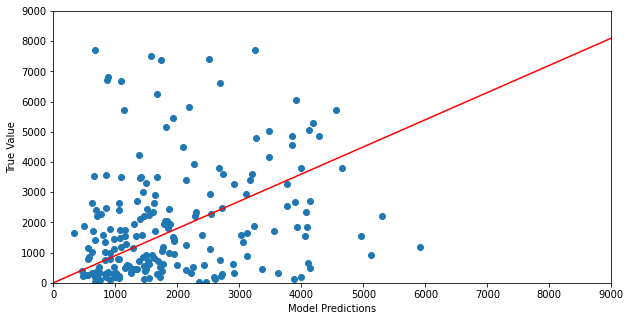

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(test_pred,y_test)
plt.xlim(0,9000)
plt.ylim(0,9000)
plt.plot([0,10000],[0,9000],'k',color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

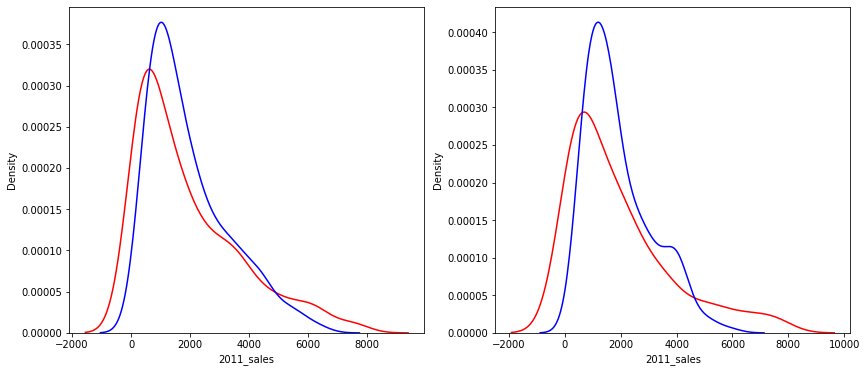

In [ ]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist =False, color='r', label ='Actual Train Values')
sns.distplot(train_pred, hist=False, color = 'b', label = 'Predicted Train Values', ax=ax1)

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color ='r', label = 'actual Test value')
sns.distplot(test_pred, hist=False, color = 'b', label = 'Predicted Test Values')
plt.show()

Từ kết quả phân tích, model không phù hợp với tập dữ liệu.

In [ ]:
#MinMaxSccaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
X = data[['2010_sales',
          'days_since_last_purchase',
          'number_of_purchase',
          'avg_order_cost'
]]

In [ ]:
X = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 12)

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
print('R-square of train:', r2_score(y_true=y_train,y_pred = train_pred))
print('R-square of test:', r2_score(y_true=y_test,y_pred=test_pred))

R-square of train: 0.87824367805669
R-square of test: -0.11815911360446996


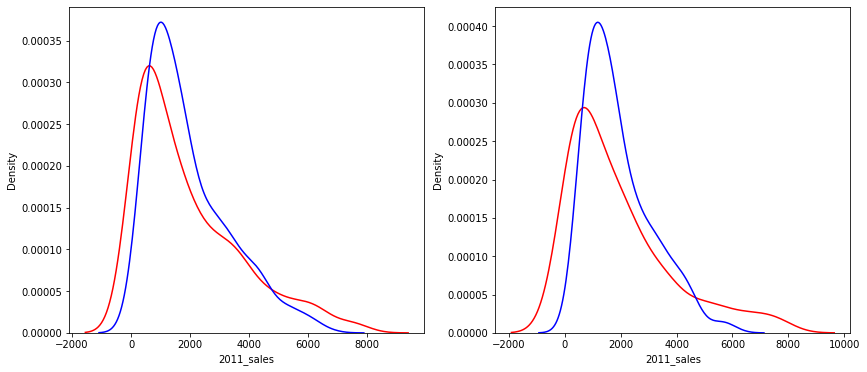

In [ ]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist =False, color='r', label ='Actual Train Values')
sns.distplot(train_pred, hist=False, color = 'b', label = 'Predicted Train Values', ax=ax1)

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color ='r', label = 'actual Test value')
sns.distplot(test_pred, hist=False, color = 'b', label = 'Predicted Test Values')
plt.show()

#Predicting new value

In [ ]:
single_customer = pd.DataFrame({
    '2010_sales':[1000],
    'days_since_last_purchase':[20],
    'number_of_purchase':[2],
    'avg_order_cost':[500]
})

In [ ]:
model.predict(single_customer)

array([4094.718])